In [11]:
import pandas as pd
from sqlalchemy import create_engine

In [12]:

engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
connection = engine.connect()


In [16]:
new_df = pd.read_sql_table(
    'salaries',
    con=engine
)
new_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd4daeb748>,
      dtype=object)

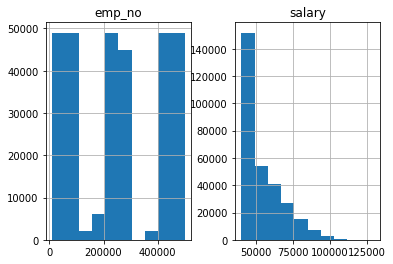

In [17]:
new_df.hist(bins = 10)